The provided data contains various details and attributes associated with used cars. The
target variable, which is the central focus of analysis, is the price of the used cars, and it is measured in
lakhs. The data in this dataset is tabular, with rows and columns, where each row represents a specific
used car listing, and each column represents a particular attribute or feature of these cars. Features are
Make and model of the car, Location or city of sale, Year of manufacture, Mileage, Odometer
(kilometers driven), Fuel type (petrol or diesel), Transmission type (manual or automatic), Number of
owners, Engine displacement, Engine horsepower, Number of seats, and Price when the car was new.

The first thing I will do is import required modules and load the data into a pandas dataframe. I'll also create variables equal to the raw and cleaned data file paths.

In [424]:
import pandas as pd
import os

# Define the paths
raw_data_path = '../data-raw/train.csv'
cleaned_data_path = '../data-clean/cleaned-train.csv'

# Load the data into a pandas DataFrame
df = pd.read_csv(raw_data_path, index_col=0, na_values=['', ' ', '\t'])
# na_values=['',' ','\t'] is setting any empty string, single space, or tab in a cell equal to NaN

a) Look for the missing values in all the columns and either impute them (replace with mean,
median, or mode) or drop them. Justify your action for this task. 

In [425]:
# Find out how many missing values are in each column 

# Count the number of missing values per column
missing_values_count = df.isna().sum()

# Print the number of missing values per column
print('Missing values in each column:\n')
print(missing_values_count)

# Save the cleaned data
df.to_csv(cleaned_data_path)

Missing values in each column:

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  38
New_Price            5032
Price                   0
dtype: int64


# Addressing missing values in 'Mileage' 


In [426]:
# Printing the full row of the 2 cars with mileage values of NaN
nan_mileage_rows = df[df['Mileage'].isna()]
print(nan_mileage_rows)
# It turns out both the cars with NaN mileage values were electric cars.

                           Name Location  Year  Kilometers_Driven Fuel_Type  \
4446       Mahindra E Verito D4  Chennai  2016              50000  Electric   
4904  Toyota Prius 2009-2016 Z4   Mumbai  2011              44000  Electric   

     Transmission Owner_Type Mileage   Engine   Power  Seats   New_Price  \
4446    Automatic      First     NaN    72 CC  41 bhp    5.0  13.58 Lakh   
4904    Automatic      First     NaN  1798 CC  73 bhp    5.0         NaN   

      Price  
4446  13.00  
4904  12.75  


JUSTIFICATION (To remove rows with NaN value in mileage column)

Given that the NaN mileage values are for electric cars, using the mean, median, or mode of the mileage for non-electric cars wouldn't make sense, as these measures of central tendency are not applicable to electric vehicles. It wouldn't be appropriate to impute mileage for electric cars using these statistics derived from fuel-powered cars. This is because electric cars do not have mileage in the traditional sense, and imputing such values would lead to inaccuracies.

In [427]:
# Printing number of cars with electric fuel type
electric_rows = len(df[df['Fuel_Type'] == 'Electric'])
print(electric_rows)

2


JUSTIFICATION (cont.)

Homogeneity of Data: The vast majority of the vehicles in the dataset are powered by traditional combustion engines, which means the 'Mileage' attribute is measured in terms like kmpl or km/kg. Electric vehicles, on the other hand, do not measure fuel efficiency in these terms. Including them would introduce a different type of measurement that is not directly comparable to the other vehicles in the dataset.

Statistical Significance: With only two electric vehicles out of 6,000, these entries constitute a very small fraction of the dataset (approximately 0.033%). Their exclusion is unlikely to significantly alter any statistical analysis due to their negligible representation in the data.

Data Consistency: For machine learning models or statistical analyses that expect uniform types of inputs, having two entries with a fundamentally different underlying concept of 'Mileage' could potentially introduce noise into the model or skew the analysis.


Assignment Constraints: Based on the instructions provided for the assignment, there may not be a mechanism or guideline for handling the 'Mileage' of electric vehicles. Thus, in the absence of a clear method for conversion or accommodation, removing these data points may be the most straightforward compliance with the assignment's requirements. (The handout said impute with mean,median,mode or drop so I am not employing other options like a separate column)

In [428]:
# Removal of the 2 rows with the electric cars that have NaN for a mileage value (heavily justified above)

# Dropping rows is a last resort, see justification above for why it is done here
df = df.dropna(subset=['Mileage'])

# Save the cleaned data
df.to_csv(cleaned_data_path)

# Addressing missing values in 'Engine' column

count    5809.000000
mean     1631.792391
std       601.724341
min       624.000000
25%      1198.000000
50%      1497.000000
75%      1991.000000
max      5998.000000
Name: Engine, dtype: float64
Skewness: 1.4128040259934405


/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


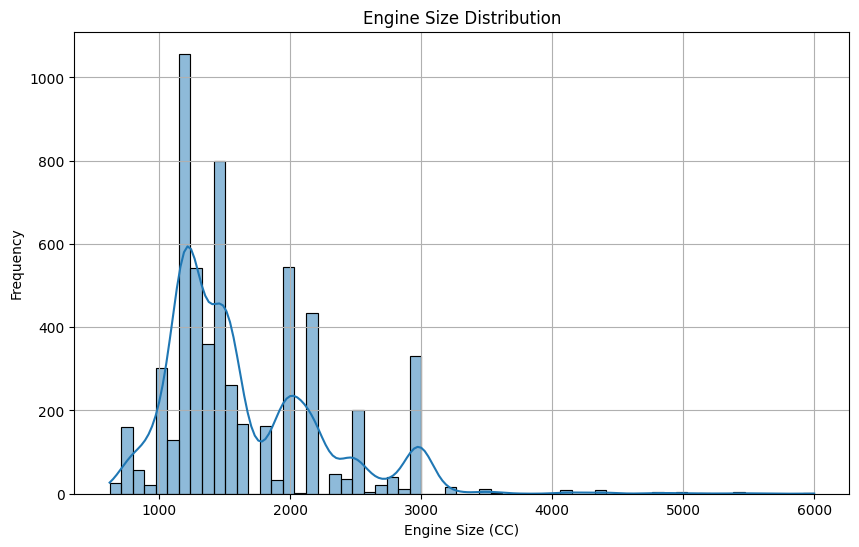

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


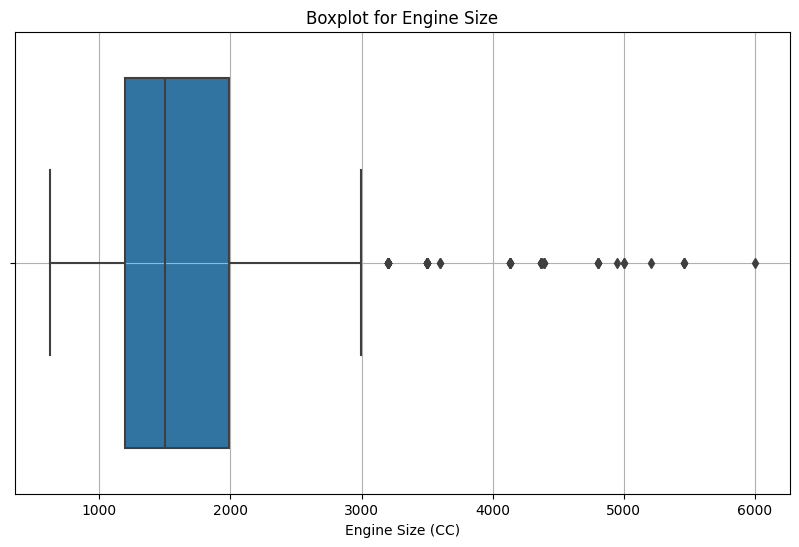

In [429]:
import seaborn as sns
import matplotlib.pyplot as plt

# Performing statistical analysis to make the decision between using median and mean for imputation
# Remove ' CC' and convert the column to numeric, coercing errors to NaN (in case there are any non-numeric entries)
df['Engine'] = pd.to_numeric(df['Engine'].str.replace(' CC', ''), errors='coerce')

# Now, you can check for skewness and outliers.

# Statistical Summary
print(df['Engine'].describe())

# Skewness
print(f"Skewness: {df['Engine'].skew()}")

# Histogram to show the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Engine'], kde=True)
plt.title('Engine Size Distribution')
plt.xlabel('Engine Size (CC)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Boxplot to show the spread and identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Engine'])
plt.title('Boxplot for Engine Size')
plt.xlabel('Engine Size (CC)')
plt.grid(True)
plt.show()

JUSTIFICATION (Using median 'Engine' value for all NaN 'Engine' values)
Analysis:
Count: There are 5,811 non-null entries in the 'Engine' column.
Mean: The average engine size is approximately 1631.55 CC.
Standard Deviation (std): The std is 601.72 CC, indicating that there is a fair amount of variation in engine sizes.
Min/Max: The smallest engine size is 624 CC and the largest is 5998 CC, showing a wide range of engine sizes.
Quartiles: 50% of the engines (the middle 50%, between the 25th and 75th percentiles) range from 1198 CC to 1991 CC.
Skewness: The skewness value is 1.41, which indicates a right-skewed (positive skew) distribution. This suggests that there is a tail in the distribution towards the larger engine sizes.
Given the positive skewness, which is above 1, and the fact that the mean is greater than the median (50th percentile), the distribution of engine sizes is right-skewed. This typically means there are outliers on the higher end (larger engine sizes) that are pulling the mean to the right.

In this case, using the median value might be a better choice for imputing missing values because it is less influenced by the right-skewed data and outliers. The median provides a more robust central tendency measure for a skewed distribution and will ensure that the imputed values are representative of the "central" data and not the outliers.

In [430]:
# Imputing the median for the 'engine' NaN values

# Impute missing values with the median
df['Engine'].fillna(df['Engine'].median(), inplace=True)

# Save the cleaned data
df.to_csv(cleaned_data_path)

# Check the number of missing values in the 'Engine' column after imputation
missing_values_after = df['Engine'].isna().sum()
print(f"Missing values in 'Engine' after imputation: {missing_values_after}")


Missing values in 'Engine' after imputation: 0


# Addressing missing values in 'Power' column

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Skewness: 1.9158414814424705
count    5809.000000
mean      113.822701
std        53.894869
min        34.200000
25%        78.000000
50%        98.600000
75%       139.010000
max       560.000000
Name: Power, dtype: float64


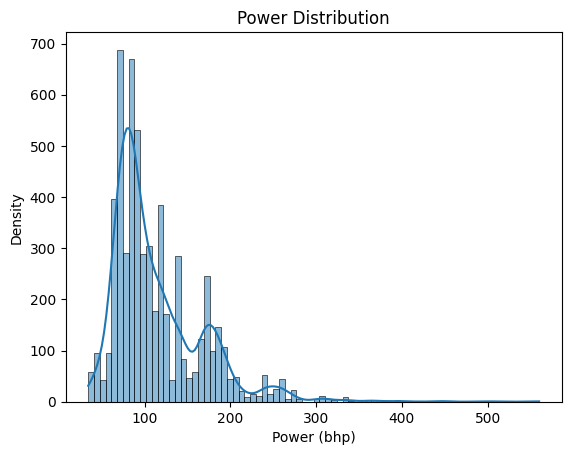

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


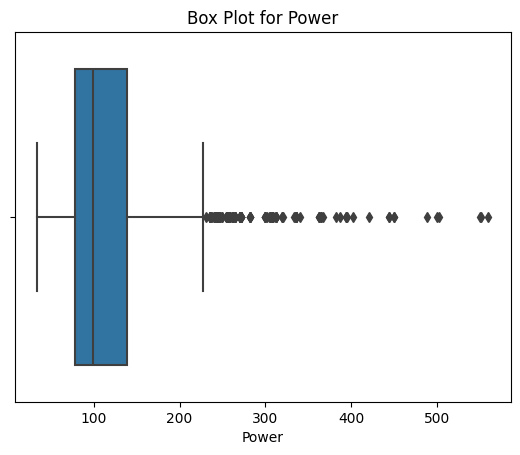

In [431]:
# Convert 'Power' column to numeric, if not already done
df['Power'] = pd.to_numeric(df['Power'].str.replace(' bhp', ''), errors='coerce')

# Calculate the skewness
print(f"Skewness: {df['Power'].skew()}")

# Descriptive statistics
print(df['Power'].describe())

# Histogram
sns.histplot(df['Power'].dropna(), kde=True)
plt.title('Power Distribution')
plt.xlabel('Power (bhp)')
plt.ylabel('Density')
plt.show()

# Boxplot
sns.boxplot(x=df['Power'])
plt.title('Box Plot for Power')
plt.show()


JUSTIFICATION (Using median for missing values in 'Power' column)

The skewness of the 'Power' column is approximately 1.92, which indicates a positively skewed (right-skewed) distribution. Additionally, the mean is significantly higher than the median, which is another indication of right skewness. This suggests that there are vehicles with high power values that are pulling the average to the right.

Given the skewness and the presence of outliers (as indicated by the large difference between the max and the 75th percentile), it would be more appropriate to impute missing values using the median rather than the mean. The median is less affected by outliers and will provide a more central tendency for skewed distributions.

In [432]:
# Impute missing values with the median
df['Power'].fillna(df['Power'].median(), inplace=True)

# Save the cleaned data
df.to_csv(cleaned_data_path)

# After imputation, check that there are no missing values left
missing_values_after_imputation = df['Power'].isna().sum()
print(f"Missing values in 'Power' after imputation: {missing_values_after_imputation}")


Missing values in 'Power' after imputation: 0


# # Addressing missing values in 'Seats' column


JUSTIFICATION (using mode for missing values in 'Seats' column)

When imputing missing values for the 'Seats' column, it's important to note that the number of seats in a vehicle is typically a discrete and categorical feature rather than a continuous numerical one, even though it's represented by a number. Vehicles usually have a standard seating configuration (e.g., 2, 4, 5, 7, 8 seats), and these are often whole numbers without decimals.

Given the categorical nature of 'Seats', the mode (most common value) is often used for imputation because it represents the most likely seating configuration for a car in the dataset.

In [433]:
# Assuming 'df' is your DataFrame
# Calculate the mode of the 'Seats' column
seats_mode = df['Seats'].mode()[0]
# print(seats_mode)

# Impute missing values with the mode
df['Seats'].fillna(seats_mode, inplace=True)

# Save the cleaned data
df.to_csv(cleaned_data_path)

# Verify the imputation
print(f"Missing values in 'Seats' after imputation: {df['Seats'].isna().sum()}")


Missing values in 'Seats' after imputation: 0


# Addressing the 'New_Price' column

JUSTIFICATION (To drop the column entirely)
5032 missing values in a New_Price column that has 5847 entries. That is nearly 86% of the data. 

There is a possibility that you could relate the New_Price variable to some of the other variables using correlation or creating a predictive model to try and impute the values.

I don't believe the professor had the expectation of us for this assignment and because using a mean, median, or mode value wouldn't make since either, and dropping the entire row for 86% of the data is certainly out of the question.

Drop the Column: With such a high percentage of missing data, it may not be reliable or informative to impute. The imputed values could introduce significant bias and might not reflect the true variance and distribution of the original data.

In [434]:
# Drop the 'New_Price' column
df.drop('New_Price', axis=1, inplace=True)

# Save the cleaned data
df.to_csv(cleaned_data_path)

# Verify that all missing values are addressed

In [435]:
# Find out how many missing values are in each column 

# Count the number of missing values per column
missing_values_count = df.isna().sum()

# Print the number of missing values per column
print('Missing values in each column:\n')
print(missing_values_count)

# Save the cleaned data
df.to_csv(cleaned_data_path)

Missing values in each column:

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64


b) Remove the units from some of the attributes and only keep the numerical values (for
example remove kmpl from “Mileage”, CC from “Engine”, bhp from “Power”, and lakh from
“New_price”) 

This has already been done for the Engine and Power columns, and the New_Price column was removed. This still needs to be done for the Mileage column.

In [436]:
# Removing units from 'Mileage' column

df['Mileage'] = pd.to_numeric(df['Mileage'].str.extract(r'(\d+\.\d+|\d+)')[0], errors='coerce')

# Save the cleaned data
df.to_csv(cleaned_data_path)


In [437]:
# Checking if all the data in my 'Mileage', 'Engine', and 'Power' is in desired format
# Define a regular expression pattern that matches numerical values (including decimals)
numeric_pattern = r'^\d*\.?\d+$'

# Check if all entries in each column match the numerical pattern
for column in ['Mileage', 'Engine', 'Power']:
    # Extract the string representations of the data, which may include the units
    column_data_as_str = df[column].astype(str)
    # Use the 'str.match' to see if the data matches the numeric pattern
    matches_pattern = column_data_as_str.str.match(numeric_pattern)

    # Any entry that doesn't match the pattern is a suspect and should be investigated
    non_matching_entries = df[~matches_pattern]

    # Print out the non-matching entries
    print(f"Non-matching entries in column '{column}':")
    print(non_matching_entries[column])

    # Count the number of non-matching entries
    non_matching_count = len(non_matching_entries)
    print(f"Count of non-matching entries in column '{column}': {non_matching_count}")


Non-matching entries in column 'Mileage':
Series([], Name: Mileage, dtype: float64)
Count of non-matching entries in column 'Mileage': 0
Non-matching entries in column 'Engine':
Series([], Name: Engine, dtype: float64)
Count of non-matching entries in column 'Engine': 0
Non-matching entries in column 'Power':
Series([], Name: Power, dtype: float64)
Count of non-matching entries in column 'Power': 0


c) Change the categorical variables (“Fuel_Type” and “Transmission”) into numerical one hot
encoded value.

In [438]:
# Find all unique values in the 'Fuel_Type' column
unique_fuel_types = df['Fuel_Type'].unique()

# Check if the unique values are only 'Petrol' and 'Diesel' 
# 'Electric' values were removed from the df
if set(unique_fuel_types) == {'Petrol', 'Diesel'}:
    print("The dataset only contains 'Petrol' and 'Diesel' as fuel types.")
else:
    print("The dataset contains other fuel types as well.")
    print("Unique fuel types found:", unique_fuel_types)

The dataset only contains 'Petrol' and 'Diesel' as fuel types.


In [439]:
# One-hot encode the 'Fuel_Type' and 'Transmission' columns
df_encoded = pd.get_dummies(df, columns=['Fuel_Type', 'Transmission'])

# Save the cleaned data
df.to_csv(cleaned_data_path)

# df_encoded now has the original columns replaced with one-hot encoded columns
print(df_encoded.head())  # Printing the first few rows to check the new DataFrame structure

                               Name    Location  Year  Kilometers_Driven  \
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   
6            Nissan Micra Diesel XV      Jaipur  2013              86999   

  Owner_Type  Mileage  Engine   Power  Seats  Price  Fuel_Type_Diesel  \
1      First    19.67  1582.0  126.20    5.0  12.50              True   
2      First    13.00  1199.0   88.70    5.0   4.50             False   
3      First    20.77  1248.0   88.76    7.0   6.00              True   
4     Second    15.20  1968.0  140.80    5.0  17.74              True   
6      First    23.08  1461.0   63.10    5.0   3.50              True   

   Fuel_Type_Petrol  Transmission_Automatic  Transmission_Manual  
1             False                  

d) Create one more feature and add this column to the dataset (you can use mutate function in
R for this). For example, you can calculate the current age of the car by subtracting “Year” value
from the current year.

In [440]:
from datetime import datetime

# Making a new feature/column that is just the amount of kilometers driven per year
# This is just the kilometers driven by the car divided by the age of the car in years
# The age of the car is just current year - 'Year', and that value is the denominator

# Get the current year
current_year = datetime.now().year

# Create the new 'KM/YR' column
# Note: To avoid division by zero, we add a check where current_year is the same as 'Year'
df['KM/yr'] = df.apply(lambda row: row['Kilometers_Driven'] / (current_year - row['Year']) if (current_year - row['Year']) > 0 else row['Kilometers_Driven'], axis=1)

# Display the DataFrame to verify the new column
print(df[['Year', 'Kilometers_Driven', 'KM/yr']])

      Year  Kilometers_Driven         KM/yr
1     2015              41000   5125.000000
2     2011              46000   3833.333333
3     2012              87000   7909.090909
4     2013              40670   4067.000000
6     2013              86999   8699.900000
...    ...                ...           ...
6014  2014              27365   3040.555556
6015  2015             100000  12500.000000
6016  2012              55000   5000.000000
6017  2013              46000   4600.000000
6018  2011              47000   3916.666667

[5845 rows x 3 columns]
